In [32]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
data=pd.read_csv(r"C:\Users\sathv\LU\datasets\train.csv")

In [34]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data1=data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [36]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S
885,1,1,female,19.0,0,0,30.0000,S
886,0,3,female,45.0,1,2,23.4500,S
887,1,1,male,26.0,0,0,30.0000,C


In [37]:
#Preprcoessing
le=preprocessing.LabelEncoder()
data1['Sex']=le.fit_transform(data1['Sex'])
data1['Embarked']=le.fit_transform(data1['Embarked'])

In [38]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,2
885,1,1,0,19.0,0,0,30.0000,2
886,0,3,0,45.0,1,2,23.4500,2
887,1,1,1,26.0,0,0,30.0000,0


In [39]:
from sklearn import neighbors
y=data1['Pclass']
x=data1.drop('Pclass',axis=1)
x.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,1,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,0,1,35.0,0,0,8.0500,2


In [40]:
k=[]
acc_score=[]

In [41]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
for i in range(1,y_test.count()):
    knn=neighbors.KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    k.append(i)
    acc_score.append(score)
dict1=dict(zip(k,acc_score))
key1=max(dict1,key=dict1.get)
print("The maximum accuracy score for this model is",max(acc_score),"for key=",key1)


The maximum accuracy score for this model is 0.8764044943820225 for key= 3


In [44]:
import matplotlib.pyplot as plt

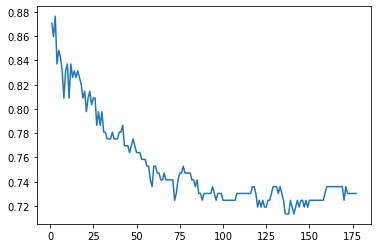

In [45]:
plt.plot(k,acc_score)

In [50]:
#Confusion Matrix
knn=neighbors.KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[41,  6,  0],
       [ 4, 26,  5],
       [ 5,  2, 89]], dtype=int64)